In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

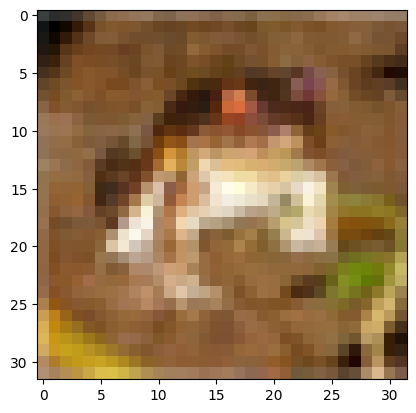

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
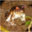

In [ ]:
X_train[0]

#Scaling

In [ ]:
X_train = X_train/255
X_test=X_test/255

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,440,586 (9.31 MB)

 Trainable params: 2,440,586 (9.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(X_train)


##Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(datagen.flow(X_train, y_cat_train, batch_size=32),
          validation_data=(X_test, y_cat_test),
          epochs=20,
          callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.3698 - loss: 1.7047 - val_accuracy: 0.5204 - val_loss: 1.3686
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5659 - loss: 1.2165 - val_accuracy: 0.6546 - val_loss: 0.9940


In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.75356,0.694911,0.7543,0.741176
1,0.76244,0.680661,0.7661,0.705460
2,0.76652,0.665205,0.7603,0.729852
3,0.77064,0.657008,0.7673,0.692972
4,0.77742,0.644138,0.7778,0.664849


<Axes: >

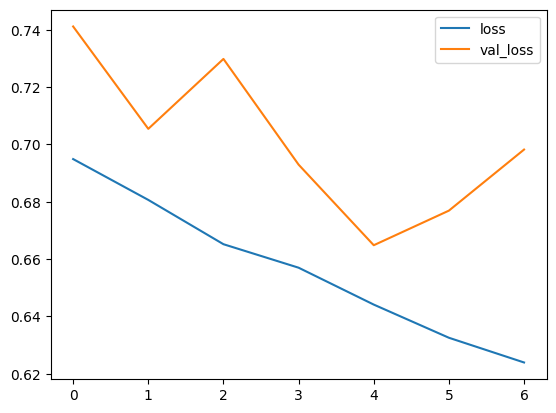

In [ ]:
losses[['loss','val_loss']].plot()

<Axes: >

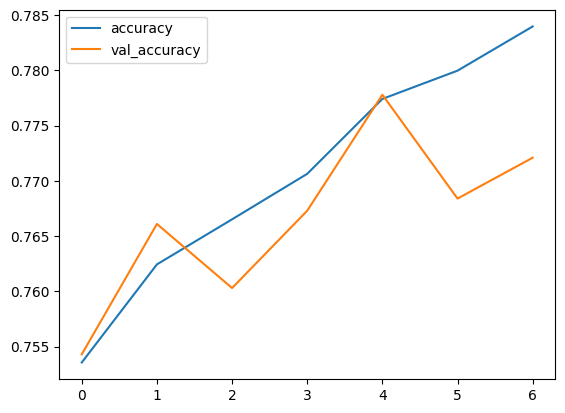

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions=np.argmax(model.predict(X_test),axis=1)
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.85      0.83      0.84      1000
           2       0.82      0.58      0.68      1000
           3       0.69      0.51      0.58      1000
           4       0.77      0.77      0.77      1000
           5       0.69      0.75      0.72      1000
           6       0.73      0.90      0.81      1000
           7       0.83      0.80      0.82      1000
           8       0.89      0.84      0.86      1000
           9       0.71      0.92      0.80      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[818,  23,  18,   5,   8,   6,   7,  10,  50,  55],
       [  6, 834,   1,   1,   1,   3,   7,   1,   9, 137],
       [ 76,  16, 585,  50,  69,  64,  79,  29,  11,  21],
       [ 29,  14,  33, 505,  56, 175,  98,  32,  13,  45],
       [ 18,  10,  25,  26, 772,  28,  66,  41,   3,  11],
       [ 10,   8,  23,  87,  36, 746,  31,  34,   5,  20],
       [ 14,   8,  15,  22,  19,  11, 900,   2,   2,   7],
       [ 17,   8,   7,  22,  38,  41,  33, 801,   0,  33],
       [ 46,  36,   2,  11,   4,   3,   7,   5, 839,  47],
       [ 21,  27,   1,   6,   1,   5,   2,   5,  11, 921]])